In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DataSet/startup_funding.csv')
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [3]:
df['Investors Name'] = df['Investors Name'].fillna('UnDisclosed')
sorted(df['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [4]:
sorted(df['Startup Name'].unique().tolist())

['"BYJU\\\\\'S"',
 '#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Air

Preprocessing

In [5]:
# 1
df.drop(columns=['Remarks'],inplace =True)

In [6]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [7]:
df.set_index('Sr No',inplace =True)

In [8]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'City',
    'Investors Name':'investor',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace =True)

change funding amount to crore

In [9]:
df['amount'] = df['amount'].fillna('0')

In [10]:
# Remove comma(,) from the amount
df['amount'] = df['amount'].str.replace(',','')

In [11]:
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('undisclosed','0')

In [12]:
df = df[df['amount'].str.isdigit()]

In [13]:
df['amount'] = df['amount'].astype('float')

In [14]:
def to_inr(dollor):
    inr  = dollor*82.5
    return inr/10000000

In [15]:
print(df['amount'].dtype)

float64


In [16]:
df['amount']=df['amount'].apply(to_inr)

In [17]:
df.shape

(3029, 8)

In [18]:
# converting date column to date time OBJECT
df['date'] = df['date'].str.replace('05/072018','05/07/2018')
df['date']= pd.to_datetime(df['date'],errors='coerce')

**Drop the missing value data upto 10%**

In [19]:
df.dropna(subset=['startup','vertical','City','investor','round','amount'])

,date,startup,vertical,subvertical,City,investor,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2870,NaT,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,NaT,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000


In [20]:
df.to_csv('startup_cleaned.csv',index=False)

In [21]:
sorted(set(df['investor'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [22]:
df[df['investor'].str.contains('Mumbai Angels Network')][['date','startup','vertical','City','round','amount']]

,date,startup,vertical,City,round,amount
Sr No,,,,,,
234,2018-11-06,Theranosis,Healthcare,Hyderabad,Seed/ Angel Funding,0.0000
394,2018-05-01,WOTU,E-commerce,Bengaluru,Angel / Seed Funding,0.0000
457,NaT,WeDoSky,Technology,Delhi,Private Equity,0.0000
1080,NaT,Vahdam Teas,eCommerce,New Delhi,Seed Funding,5.3625


In [23]:
df[df['investor'].str.contains('IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 990.000000
Lenskart                 495.000000
Bizongo                  206.250000
CureFit                  206.250000
Vserv                    123.750000
Curefit                  123.750000
Fintellix                123.750000
Xpressbees               103.125000
FirstCry.com              82.500000
Uniphore                  72.600000
POPxo                     70.950000
Aasaanjobs                53.625000
HealthifyMe               49.500000
\\xc2\\xa0CloudCherry     49.500000
Sigtuple                  47.850000
Tripoto                   46.128844
Flyrobe                   43.725000
RentMojo                  41.250000
Vayana                    33.000000
Agrostar                  33.000000
PlaySimple                33.000000
Blowhorn                  30.112500
MyNoticePeriod            24.750000
Active.ai                 24.750000
Heckyl                    22.275000
CreditMantri              20.625000
eShakti                   18.975000
LensKart            

<Axes: ylabel='amount'>

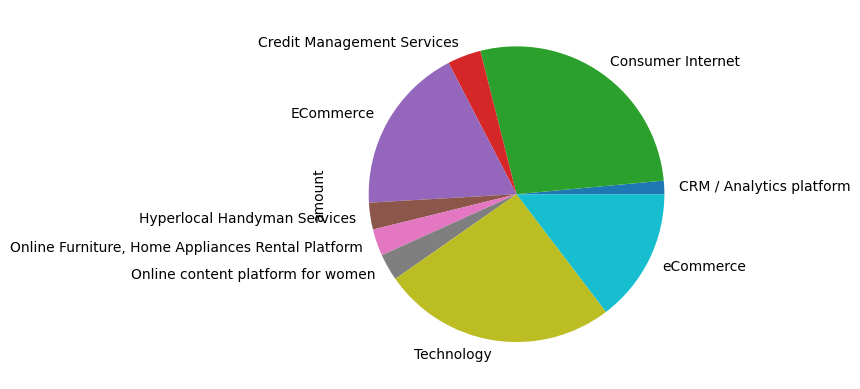

In [31]:
df[df['investor'].str.contains('IDG Ventures ')].groupby('vertical')['amount'].sum().plot(kind ='pie')